# Part 3: Galaxy morphology: visualization and stellar kinematics
In this final part, we will turn to the hydrodynamical TNG simulation that includes gas and stars. Using the ``pynbody`` package, we make detailed visualizations of the galaxy and analyze its kinematics.

In [12]:
import pynbody

# Load the simulation and present it in physical units. 
f = pynbody.load("/snap8/scratch/do020/dc-elbe1/summer_school/morphology/snapdir_261/snap_261")
f.physical_units()

/cosma/home/durham/dc-elbe1/venvs/my_environment/lib/python3.12/site-packages/pynbody/snapshot/gadgethdf.py:761: UserWarning: Masses are either stored in the header or have another dataset name; assuming the cosmological factor h**-1
  warnings.warn("Masses are either stored in the header or have another dataset name; assuming the cosmological factor %s" % units.h**-1)


In [13]:
# Load the corresponding halo catalogue
h = f.halos()

In [14]:
# Centre the first halo
pynbody.analysis.center(h[0])

<Transformation null, translate, offset_velocity>

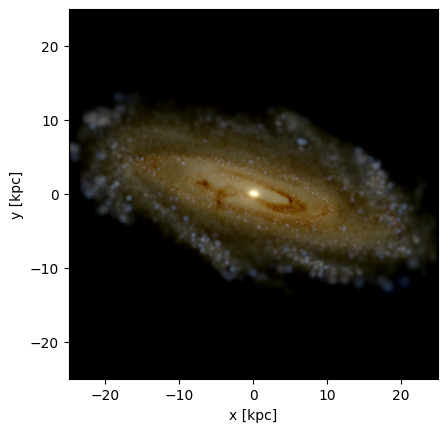

In [15]:
# Make an image of the stars with dust obscuration
pynbody.plot.stars.render(f, with_dust=True, width="50 kpc", mag_range=[18, 26])

In [16]:
# Align the halo so it's face-on
pynbody.analysis.faceon(h[0])

<Transformation faceon>

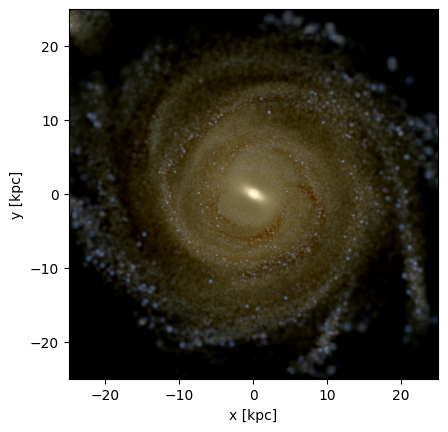

In [17]:
# Make the same image again
pynbody.plot.stars.render(f, with_dust=True, width="50 kpc", mag_range=[18, 26])

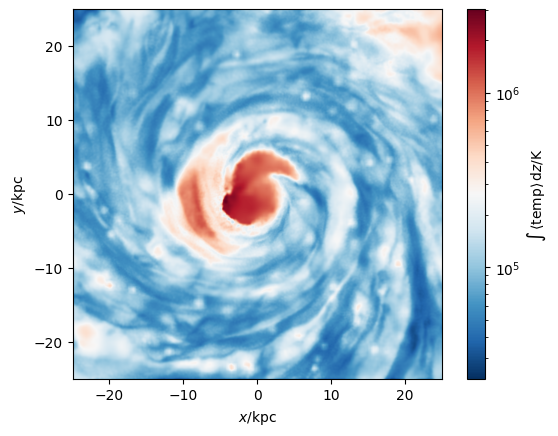

In [18]:
# Another example: density-weighted temperature of the gas
pynbody.plot.sph.image(f.gas, qty='temp', av_z='rho', width="50 kpc", cmap='RdBu_r')

We can also built-in functionality to study the stellar kinematics.

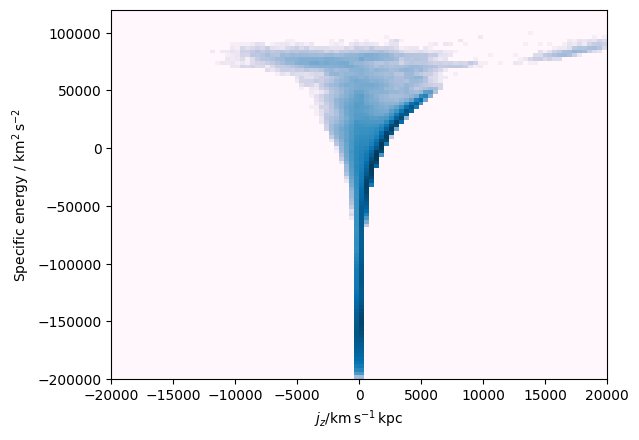

In [19]:
# Kinematic plot: specific energy vs z (disk-perpendicular angular momentum)
_ = pynbody.plot.generic.hist2d(h[0].s['jz'], h[0].s['te'], y_range=(-2e5,1.2e5), x_range=(-2e4, 2e4), plot_type='image',
                                xlabel=r'$j_z / {\rm km\,s^{-1}\,kpc}$', ylabel=r"Specific energy / ${\rm km^2 \,s^{-2}}$", cmap='PuBu')

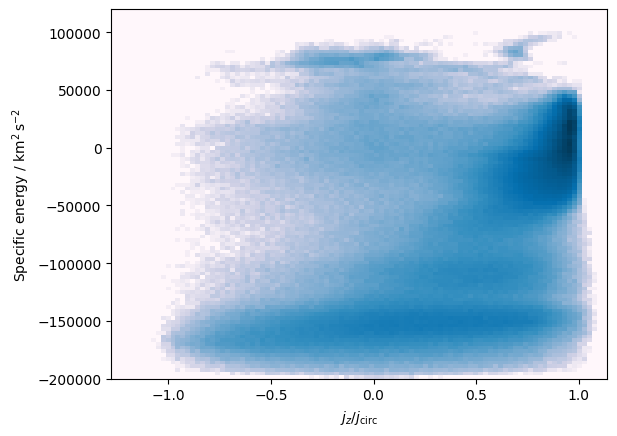

In [20]:
# Same plot, but now dividing out the circular angular momentum to show more clearly features at low energy
pynbody.analysis.morphology.estimate_jcirc_from_energy(h[0].s)
_ = pynbody.plot.generic.hist2d(h[0].s['jz']/h[0].s['j_circ'], h[0].s['te'], y_range=(-2e5,1.2e5), plot_type='image',
                                xlabel=r'$j_z / j_{\rm circ}$', ylabel=r"Specific energy / ${\rm km^2 \,s^{-2}}$", cmap='PuBu')

For more ideas: refer to the pynbody tutorials at https://pynbody.readthedocs.io/latest/tutorials/images.html